In [2]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving data-house-pricing-train.csv to data-house-pricing-train.csv


In [0]:
# %matplotlib inline
import numpy
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf
from   tensorflow.keras          import layers
from   sklearn.preprocessing     import LabelEncoder, OneHotEncoder, StandardScaler
from   sklearn.model_selection   import train_test_split
from   sklearn.feature_selection import SelectKBest
from   sklearn.feature_selection import chi2
from   sklearn.ensemble          import ExtraTreesClassifier
from   sklearn.model_selection   import train_test_split
from   sklearn                   import linear_model
from   sklearn.linear_model      import LinearRegression
from   sklearn                   import metrics
from   keras.models              import Sequential
from   keras.layers              import Dense, Dropout

In [84]:
print("Versions:")
print("Tensorflow:", tf.VERSION)
# 1.14.0-rc1
print("Keras: ", tf.keras.__version__)
#2.2.4-tf

Versions:
Tensorflow: 1.14.0
Keras:  2.2.4-tf


In [0]:
# Load house-pricing dataset
path = "./data-house-pricing-train.csv"
dataset = pd.read_csv(path)

In [0]:
# Function replace object typed columns with int64 typed columns by one hot encoding method
def one_hot_encoding(dataset, column_index, row_length):
  y = dataset.iloc[:, column_index].values
  le = LabelEncoder()
  y = le.fit_transform(y)
  y = pd.Series(y.reshape(row_length,))
  return y

In [0]:
# Collect categorical values to make binary variables
categorical_columns = []
for i in dataset.columns.values:
    if(dataset[i].dtype == 'object'):
        categorical_columns.append(i)

In [126]:
# Handle NaN values of dataset
def handling_NaN(dataset):
    features = dataset.columns.values
    row_length = len(dataset)
  
    for j, feature in enumerate(features):
        if (dataset[feature].dtype == 'int64' or dataset[feature].dtype == 'float64'):
            dataset[feature].fillna(dataset[feature].mean(), inplace = True)
        
    for i, feature in enumerate(features):
        if (dataset[feature].dtype == 'object'):
            dataset[feature].fillna("NA", inplace = True)
        
    return dataset

'\n#Handling NaN values and one hot encoding all object typed columns\nfeatures = dataset.columns.values\nrow_length = len(dataset)\n\nfor j, feature in enumerate(features):\n    if (dataset[feature].dtype == \'int64\' or dataset[feature].dtype == \'float64\'):\n        dataset[feature].fillna(dataset[feature].mean(), inplace = True)\n        \nfor i, feature in enumerate(features):\n    if (dataset[feature].dtype == \'object\'):\n        dataset[feature].fillna("NA", inplace = True)\n        dataset[feature] = one_hot_encoding(dataset, i, row_length)\n'

In [0]:
dataset = handling_NaN(dataset)

for k, feature in enumerate(dataset.columns.values):
    dataset[feature] = one_hot_encoding(dataset, k, len(dataset))

In [128]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,5,3,36,327,1,1,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,129,2,4,2,2,4,4,2,361,6,0,73,179,1,...,1,5,134,232,0,531,1,0,2,1,3,1,2,6,6,0,3,1,90,2,2,220,5,5,2,0,49,0,0,0,0,3,4,1,0,1,2,8,4,412
1,1,0,3,52,498,1,1,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,3,0,3,4,1,2,4,1,0,482,6,0,167,441,1,...,1,5,427,0,0,259,0,1,2,0,3,1,3,4,6,1,5,1,62,2,2,149,5,5,2,187,0,0,0,0,0,3,4,1,0,4,1,8,4,339
2,2,5,3,39,702,1,1,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,105,2,4,2,2,4,2,2,222,6,0,278,214,1,...,1,5,178,239,0,570,1,0,2,1,3,1,2,4,6,1,5,1,88,2,2,260,5,5,2,0,30,0,0,0,0,3,4,1,0,8,2,8,4,442
3,3,6,3,31,489,1,1,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,3,0,3,4,0,4,1,4,0,66,6,0,346,117,1,...,1,5,208,180,0,536,1,0,1,0,3,1,2,5,6,1,2,5,85,3,3,284,5,5,2,0,24,108,0,0,0,3,4,1,0,1,0,8,0,194
4,4,5,3,56,925,1,1,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,222,2,4,2,2,4,0,2,328,6,0,318,370,1,...,1,5,347,320,0,734,1,0,2,1,4,1,2,7,6,1,5,1,87,2,3,380,5,5,2,118,70,0,0,0,0,3,4,1,0,11,2,8,4,494


(1460, 80)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


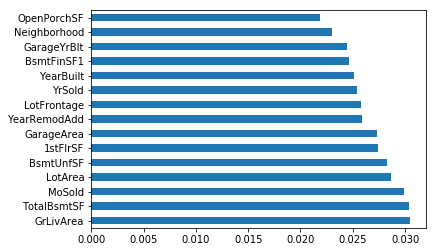

In [129]:
# Feature selection no.1 (feature importance)
del dataset['Id']
print(dataset.shape)

X = dataset.iloc[:,0:79]  #independent columns
y = dataset.iloc[:,-1]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()


In [130]:
# Feature selection no.2 (univariate selection)
X = dataset.iloc[:,0:79]  #independent columns
y = dataset.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs          Score
33   BsmtFinSF1  175046.761502
43     2ndFlrSF  156662.356995
3       LotArea  153258.463160
45    GrLivArea  152684.196937
37  TotalBsmtSF  128216.765944
42     1stFlrSF  121988.499739
25   MasVnrArea  120022.908755
36    BsmtUnfSF  115155.926925
61   GarageArea   81454.454930
65   WoodDeckSF   71779.273592


In [0]:
# Generate dummy variables and remove unnecessary columns
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(dataset)

for column in categorical_columns:
    X = generate_dummies(X, column)
    
for column in categorical_columns:
    del X[column]

In [132]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_0,MSZoning_1,MSZoning_2,...,GarageQual_4,GarageQual_5,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,PavedDrive_0,PavedDrive_1,PavedDrive_2,PoolQC_0,PoolQC_1,PoolQC_2,PoolQC_3,Fence_0,Fence_1,Fence_2,Fence_3,Fence_4,MiscFeature_0,MiscFeature_1,MiscFeature_2,MiscFeature_3,MiscFeature_4,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,5,36,327,6,4,104,53,129,361,0,73,179,134,232,0,531,1,0,2,1,3,1,6,0,90,2,220,0,49,0,0,0,0,0,1,2,412,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,52,498,5,7,77,26,0,482,0,167,441,427,0,0,259,0,1,2,0,3,1,4,1,62,2,149,187,0,0,0,0,0,0,4,1,339,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,5,39,702,6,4,102,52,105,222,0,278,214,178,239,0,570,1,0,2,1,3,1,4,1,88,2,260,0,30,0,0,0,0,0,8,2,442,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,6,31,489,6,4,19,20,0,66,0,346,117,208,180,0,536,1,0,1,0,3,1,5,1,85,3,284,0,24,108,0,0,0,0,1,0,194,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,56,925,7,4,101,50,222,328,0,318,370,347,320,0,734,1,0,2,1,4,1,7,1,87,3,380,118,70,0,0,0,0,0,11,2,494,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
X = X.values
y = y.values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [0]:
# We are going to scale to data
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [0]:
lm = LinearRegression()

In [104]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [105]:
# print the intercept
print(lm.intercept_)

[1.4612301e-16]


In [106]:
print(lm.coef_)

[[ 1.54580253e-15  3.74700271e-16  4.02455846e-16  4.99600361e-16
  -1.04083409e-16  1.20736754e-15  4.16333634e-17 -1.66533454e-16
  -1.13108515e-03 -4.36299524e-04 -1.12928337e-03  1.08135882e-03
  -2.41830850e-04 -2.80789421e-04 -3.00470209e-05  3.33890357e-04
   4.30211422e-16  1.96023753e-16  8.67361738e-17  8.32667268e-17
  -3.88578059e-16  2.49800181e-16 -8.32667268e-17  9.71445147e-16
   0.00000000e+00 -2.63677968e-16 -6.24500451e-16  1.38777878e-16
   1.94289029e-16  2.84494650e-16 -3.46944695e-17 -2.77555756e-17
   7.35522754e-16  1.32532874e-15  1.48318857e-16 -5.37764278e-17
   1.00000000e+00 -1.76722385e-04 -4.76542679e-04 -2.21151279e-04
  -9.20821492e-04 -7.99492397e-04  7.70192159e-05  7.70192159e-05
   2.90293940e-03  3.78363726e-03  2.51431424e-03 -3.78514336e-03
  -1.26967331e-03 -7.01815901e-04 -3.86911017e-03  9.92671140e-04
   8.61836219e-04  7.92972043e-04  1.48033411e-03  6.41775564e-04
   6.41775564e-04 -1.74227363e-03 -1.17729478e-03 -7.79065408e-04
  -2.34558

In [0]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

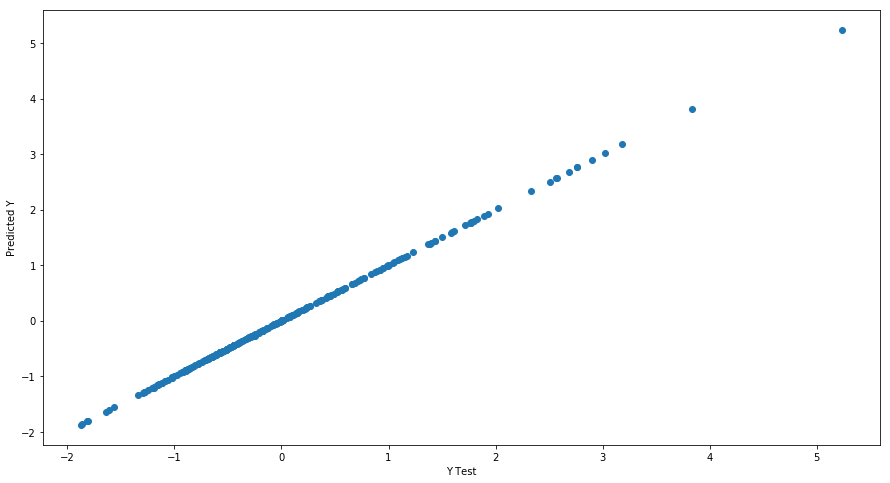

In [108]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', numpy.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0011592137624115483
MSE: 7.458625598780508e-06
RMSE: 0.0027310484431405657
